## EDA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = get_training_data('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/chest_xray/train')
test = get_training_data('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/chest_xray/val')
val = get_training_data('/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/chest_xray/test')

/var/folders/3b/d88c396s1jx1hf72ltg_cc4r0000gn/T/ipykernel_27646/771166761.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [6]:
type(train)

numpy.ndarray

/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

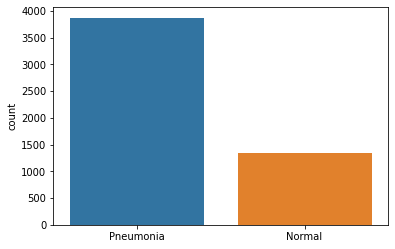

In [7]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.countplot(l) 

Text(0.5, 1.0, 'NORMAL')

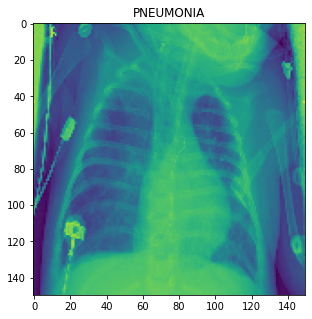

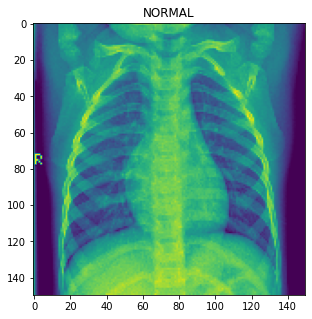

In [8]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='viridis')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='viridis')
plt.title(labels[train[-1][1]])

## Baseline

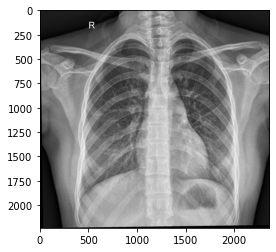

In [9]:
DATADIR = "/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/chest_xray/train"

CATEGORIES = ["Normal", "Pneumonia"]

for category in CATEGORIES:  # do Normal and Pneumonia
    path = os.path.join(DATADIR,category)  # create path to Normal and Pneumonia
    for img in os.listdir(path):  # iterate over each image per Normal and Pneumonia
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [10]:
print(img_array)

[[ 0 23 24 ...  0  0  0]
 [ 0  5 23 ...  0  0  0]
 [ 1  0 26 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [11]:
print(img_array.shape)

(2234, 2359)


In [ ]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [13]:
'''IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()'''

"IMG_SIZE = 100\nnew_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))\nplt.imshow(new_array, cmap='gray')\nplt.show()"

In [14]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do Normal and Pneumonia

        path = os.path.join(DATADIR,category)  # create path to Normal and Pneumonia
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=Normal 1=Pneumonia

        for img in tqdm(os.listdir(path)):  # iterate over each image per Normal and Pneumonia
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████████████████████████████████| 3875/3875 [00:35<00:00, 109.34it/s]

5216


In [15]:
import random

random.shuffle(training_data)

In [16]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
1
1
0
1
1
1


In [17]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[104]
   [ 96]
   [ 87]
   ...
   [ 52]
   [ 49]
   [ 41]]

  [[138]
   [134]
   [152]
   ...
   [ 83]
   [ 76]
   [ 63]]

  [[158]
   [150]
   [157]
   ...
   [113]
   [ 92]
   [ 80]]

  ...

  [[ 26]
   [ 25]
   [ 20]
   ...
   [ 76]
   [ 65]
   [ 14]]

  [[ 28]
   [ 25]
   [ 20]
   ...
   [ 87]
   [ 52]
   [ 14]]

  [[ 27]
   [ 25]
   [ 21]
   ...
   [ 93]
   [ 57]
   [ 16]]]]


In [18]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [19]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

## PCA

In [20]:
# sklearn imports
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

In [21]:
X_train, X_test, y_train, y_test = (train_test_split(X, y, 
                                                     test_size = .2, random_state = 42))

In [22]:
X_train.shape

(4172, 50, 50, 1)

In [23]:
X_test.shape

(1044, 50, 50, 1)

In [24]:
X_train_re = X_train.reshape(4172,IMG_SIZE*IMG_SIZE*1)
X_test_re = X_test.reshape(1044,IMG_SIZE*IMG_SIZE*1)

In [25]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_re)
X_test_sc = scaler.transform(X_test_re)

In [26]:
import pandas as pd
import seaborn as sns
import sklearn
%pylab inline 
import seaborn as sns
sns.set()
from IPython.display import SVG

Populating the interactive namespace from numpy and matplotlib


/Users/amirreza/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


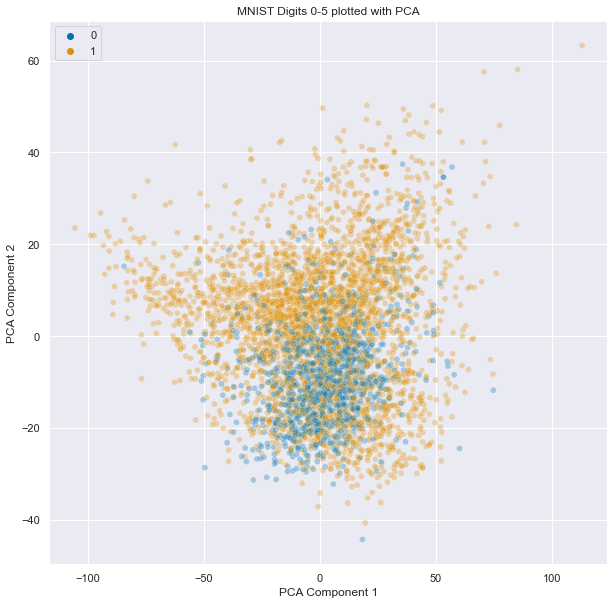

In [27]:
pca = PCA(n_components=2)

X_train_2PC = pca.fit_transform(X_train_sc)
X_test_2PC = pca.transform(X_test_sc)

figsize(10, 10)

sns.scatterplot(x=X_train_2PC[:, 0], y=X_train_2PC[:, 1],
                hue=y_train, alpha=.3,
                palette=sns.color_palette("colorblind", 2))
xlabel("PCA Component 1")
ylabel("PCA Component 2")
title("MNIST Digits 0-5 plotted with PCA");

In [28]:
lr = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train_2PC, y_train)
lr.score(X_test_2PC, y_test)

0.7059386973180076